<a href="https://colab.research.google.com/github/trungsi/DS-project---Road-accidents-in-France/blob/master/DecisionTree_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/DataScience project/Road accidents - model.csv', 'r', encoding='ISO-8859-1') as f:
  df = pd.read_csv(f, index_col=0)

df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-6-4b98f2bad7af>:6: DtypeWarning: Columns (5,11,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, index_col=0)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034545 entries, 0 to 1034544
Data columns (total 24 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Num_Acc     1034545 non-null  int64  
 1   an          1034545 non-null  int64  
 2   mois        1034545 non-null  int64  
 3   jour        1034545 non-null  int64  
 4   hrmn        1034545 non-null  object 
 5   lum         1034545 non-null  int64  
 6   agg         1034545 non-null  int64  
 7   int         1034545 non-null  int64  
 8   atm         1034472 non-null  float64
 9   col         1034526 non-null  float64
 10  com         1034545 non-null  object 
 11  adr         908057 non-null   object 
 12  gps         453015 non-null   object 
 13  lat         607560 non-null   object 
 14  long        607556 non-null   object 
 15  dep         1034545 non-null  object 
 16  grav_mean   1034545 non-null  float64
 17  grav_total  1034545 non-null  int64  
 18  nb_usagers  1034545 no

In [ ]:
df = df.drop(columns=['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'adr', 'gps', 'lat', 'long', 'com', 'grav_total', 'date', 'nb_jour', 'nb_semaine', 'vma'])
df.head()

,lum,agg,int,atm,col,dep,grav_mean,nb_usagers,surf
0,1,2,2,1.0,3.0,10,2.0,3,1.0
1,2,2,2,4.0,3.0,10,3.0,2,2.0
2,1,2,1,1.0,6.0,10,3.5,2,1.0
3,2,2,1,8.0,3.0,10,1.5,2,2.0
4,1,1,1,1.0,2.0,10,1.5,2,1.0


In [ ]:
df = df.dropna()

In [ ]:
df = df.astype({'lum' : 'str', 'agg': 'str', 'int': 'str', 'atm': 'str', 'col': 'str', 'surf': 'str', 'dep': 'str'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032546 entries, 0 to 1034544
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   lum         1032546 non-null  object 
 1   agg         1032546 non-null  object 
 2   int         1032546 non-null  object 
 3   atm         1032546 non-null  object 
 4   col         1032546 non-null  object 
 5   dep         1032546 non-null  object 
 6   grav_mean   1032546 non-null  float64
 7   nb_usagers  1032546 non-null  int64  
 8   surf        1032546 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 78.8+ MB


In [ ]:
df = pd.get_dummies(df)

In [ ]:
target = df.grav_mean
feats = df.drop(columns=['grav_mean'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.2, random_state=123)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
print("Coefficient of determination of the model on train data:", dtr.score(X_train, y_train))
print("Coefficient of determination of the model on test data:", dtr.score(X_test, y_test))

Coefficient of determination of the model on train data: 0.5406518549914102
Coefficient of determination of the model on test data: 0.32035840782969527


In [ ]:
y_test_pred = dtr.predict(X_test)
import math
print('RMSE= ', math.sqrt(((y_test_pred - y_test)**2).mean()))

RMSE=  1.871186955246957


[ 0.07317073  2.01987768  2.57175399  3.72430556 13.        ]


<Axes: ylabel='Count'>

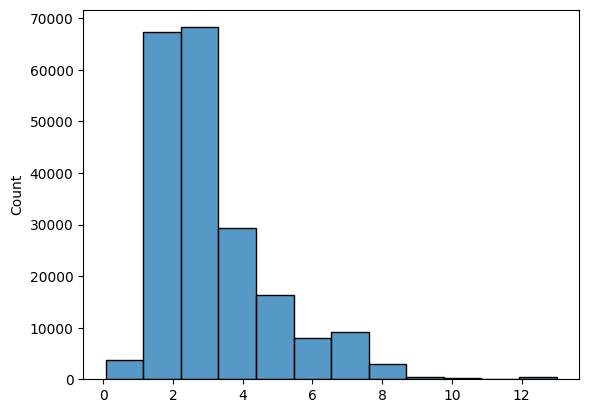

In [ ]:
import numpy as np
import seaborn as sns

print(np.percentile(y_test_pred, q=[0, 25, 50, 75, 100]))
sns.histplot(y_test_pred, bins=12)

# Decision Tree predicted values in expected range. However the overall scores and errors are more or less the same as Linear model.

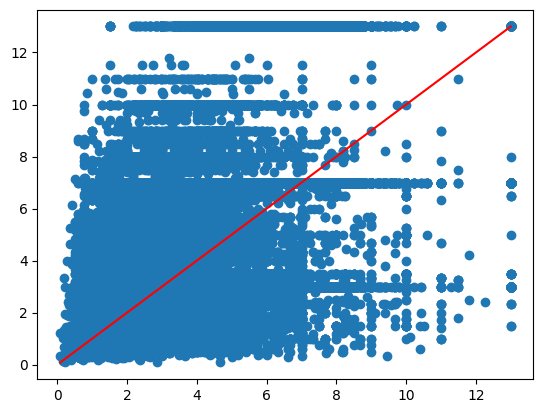

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(y_test_pred, y_test)
plt.plot((y_test.min(),y_test.max()), (y_test.min(),y_test.max()), color='red')